In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [2]:
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

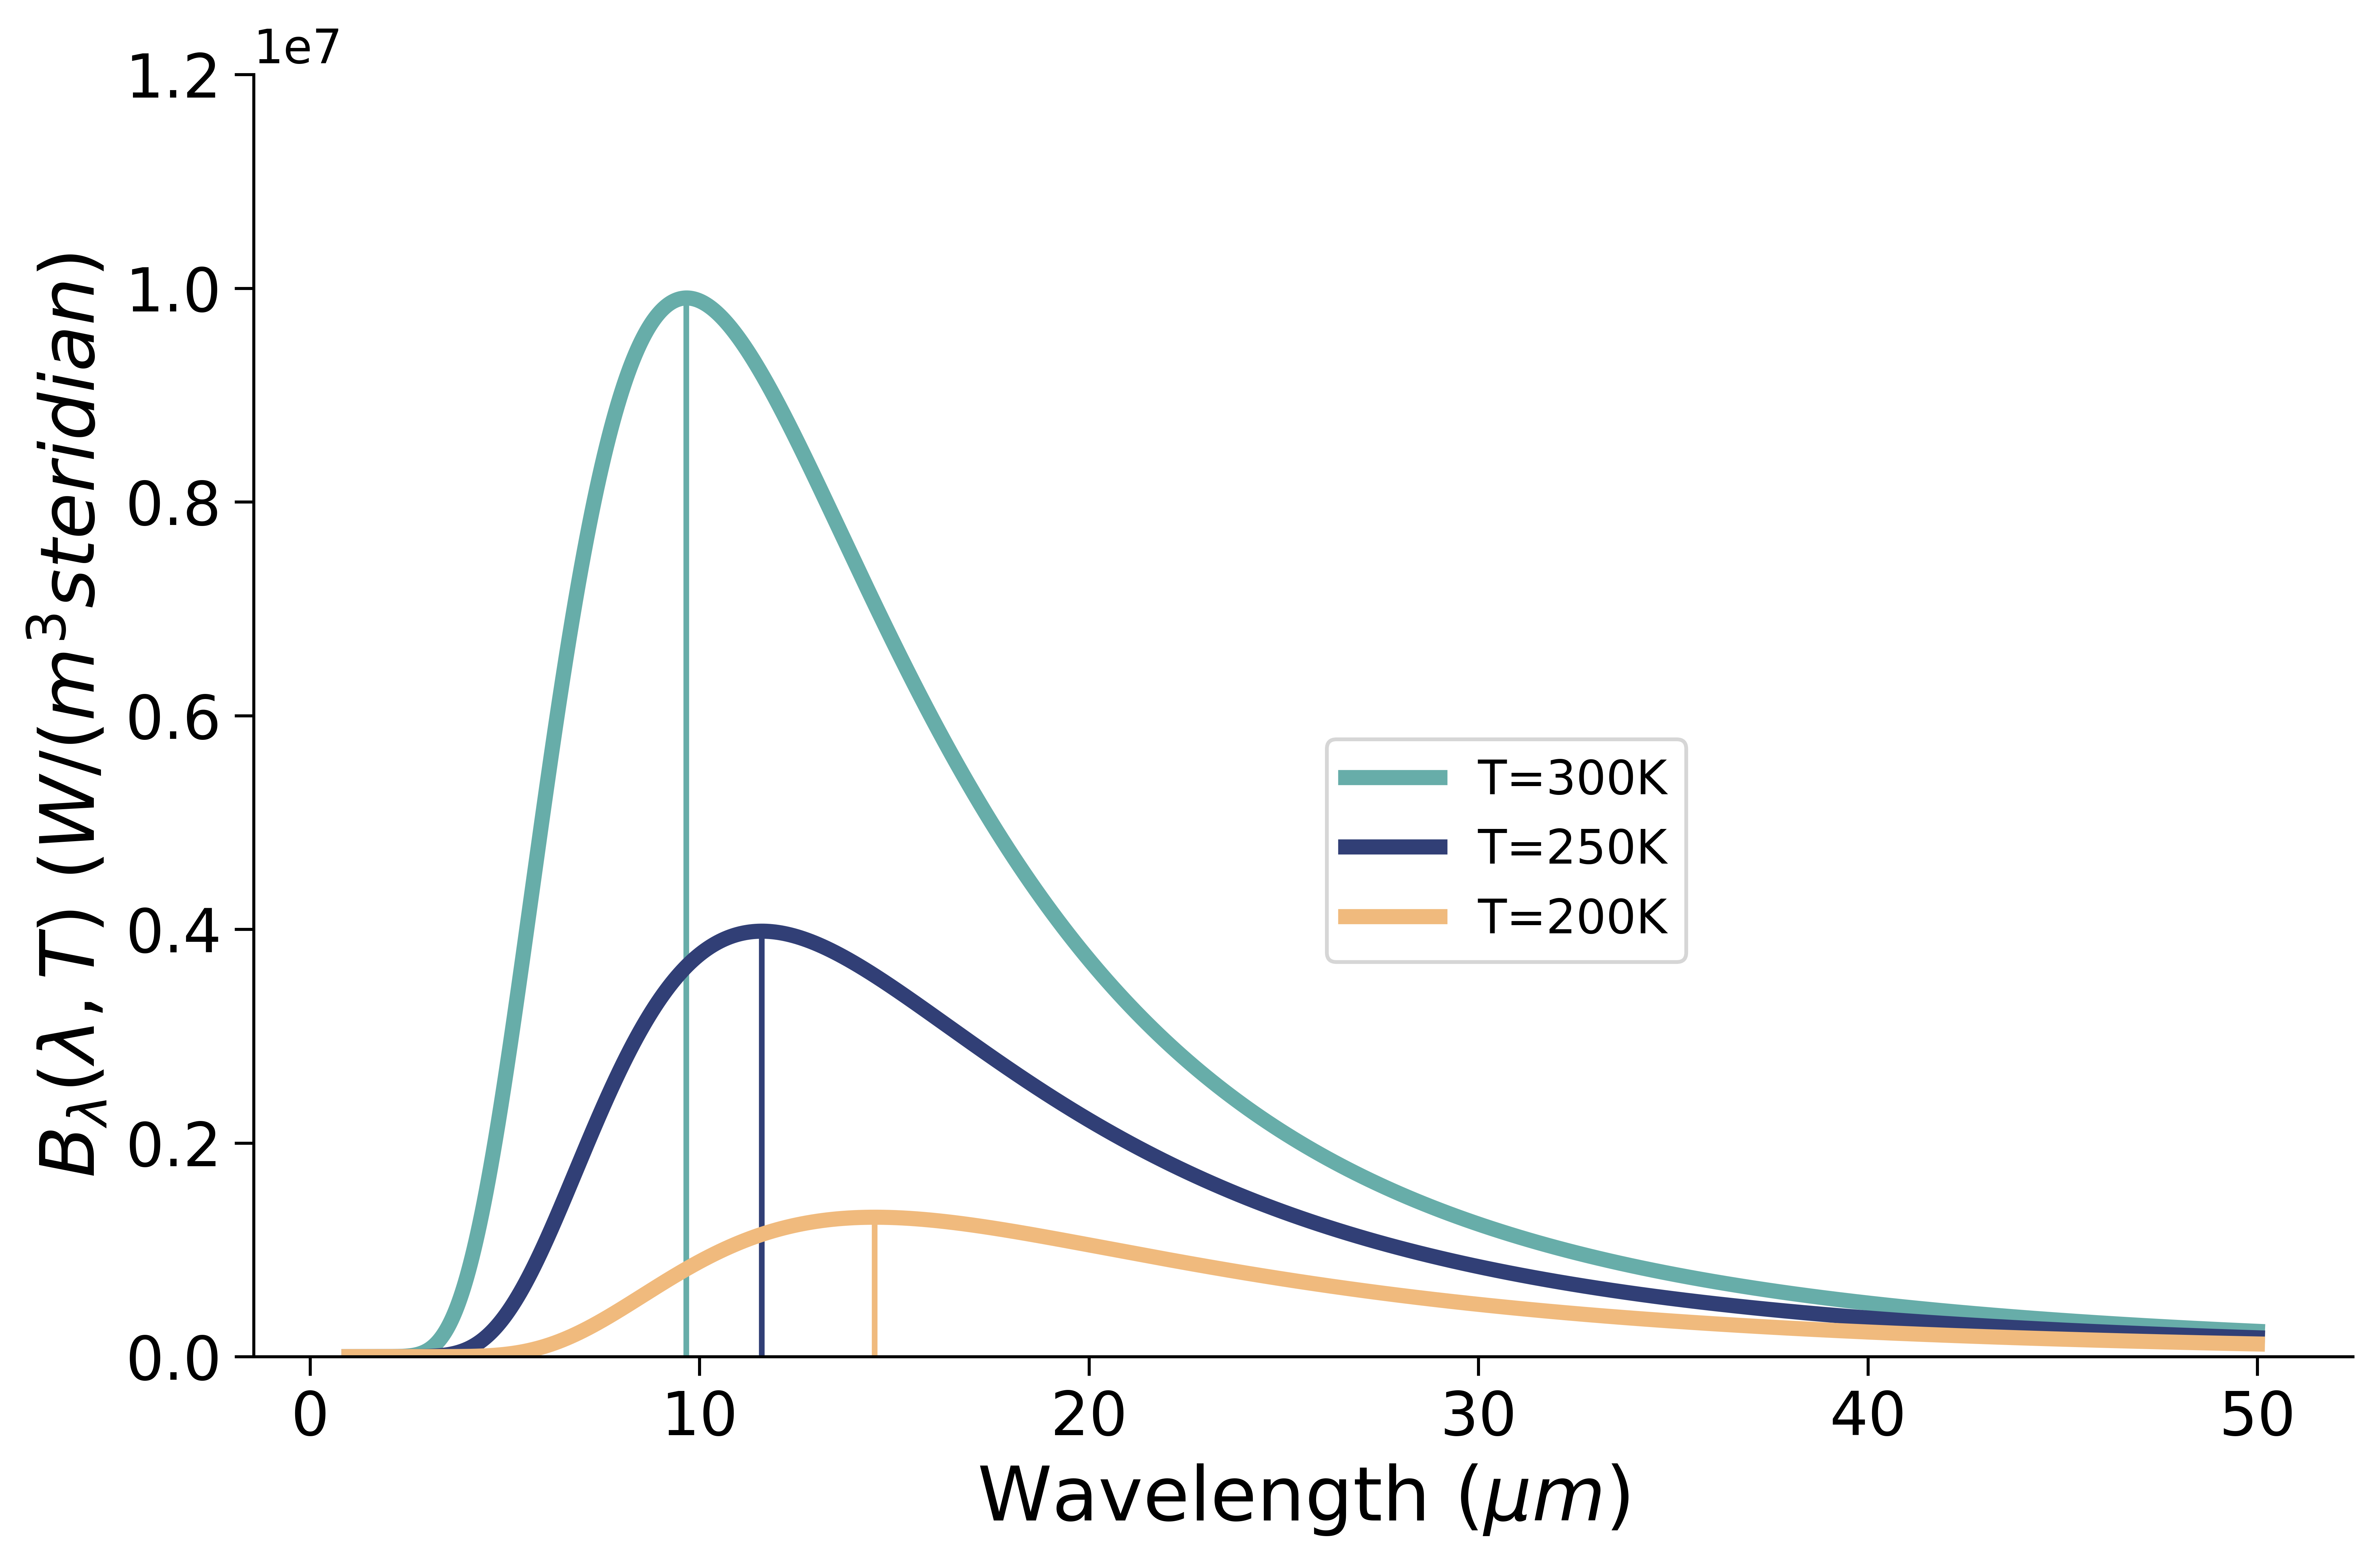

In [45]:
fig, ax1 = plt.subplots(figsize=(9, 6), dpi = 400)

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )

    lpeak = (2.898 * 1e-3)/T

    return intensity,lpeak

# generate x-axis in increments from 1um to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-6, 50e-6, 1e-9) 

# intensity and peak radiating wavelength at different temperatures
intensity200,lpeak200 = planck(wavelengths, 200.)
intensity250,lpeak250 = planck(wavelengths, 250.)
intensity300,lpeak300 = planck(wavelengths, 300.)

# get the intensity at peak wavelength to limit the lines
Ipeak300,_ = planck(lpeak300,300)
Ipeak250,_ = planck(lpeak250,250)
Ipeak200,_ = planck(lpeak200,200)

# add in wiens law
plt.vlines(x=lpeak300*1e6,ymin = 0,ymax = Ipeak300,color= '#67ada9')
plt.vlines(x=lpeak250*1e6,ymin = 0,ymax = Ipeak250, color= '#313f76')
plt.vlines(x=lpeak200*1e6,ymin = 0,ymax = Ipeak200, color= '#f0ba7d')

# plot intensity curves
ax1.plot(wavelengths*1e6, intensity300, lw = 4, label = 'T=300K', color= '#67ada9') 
ax1.plot(wavelengths*1e6, intensity250, lw = 4, label = 'T=250K', color= '#313f76') 
ax1.plot(wavelengths*1e6, intensity200, lw = 4, label = 'T=200K', color= '#f0ba7d') 

# ax1.set_xscale('log')
ax1.set_xlabel('Wavelength ($\mu m$)',fontsize = 20)
ax1.set_ylabel('$B_\lambda(\lambda,T)$ $(W/(m^3 steradian)$',fontsize = 20)
plt.ylim(0,1.2e7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# plt.title ('Spectral Radiance')

# add legend
plt.legend(bbox_to_anchor=(.5, .5))

([], [])

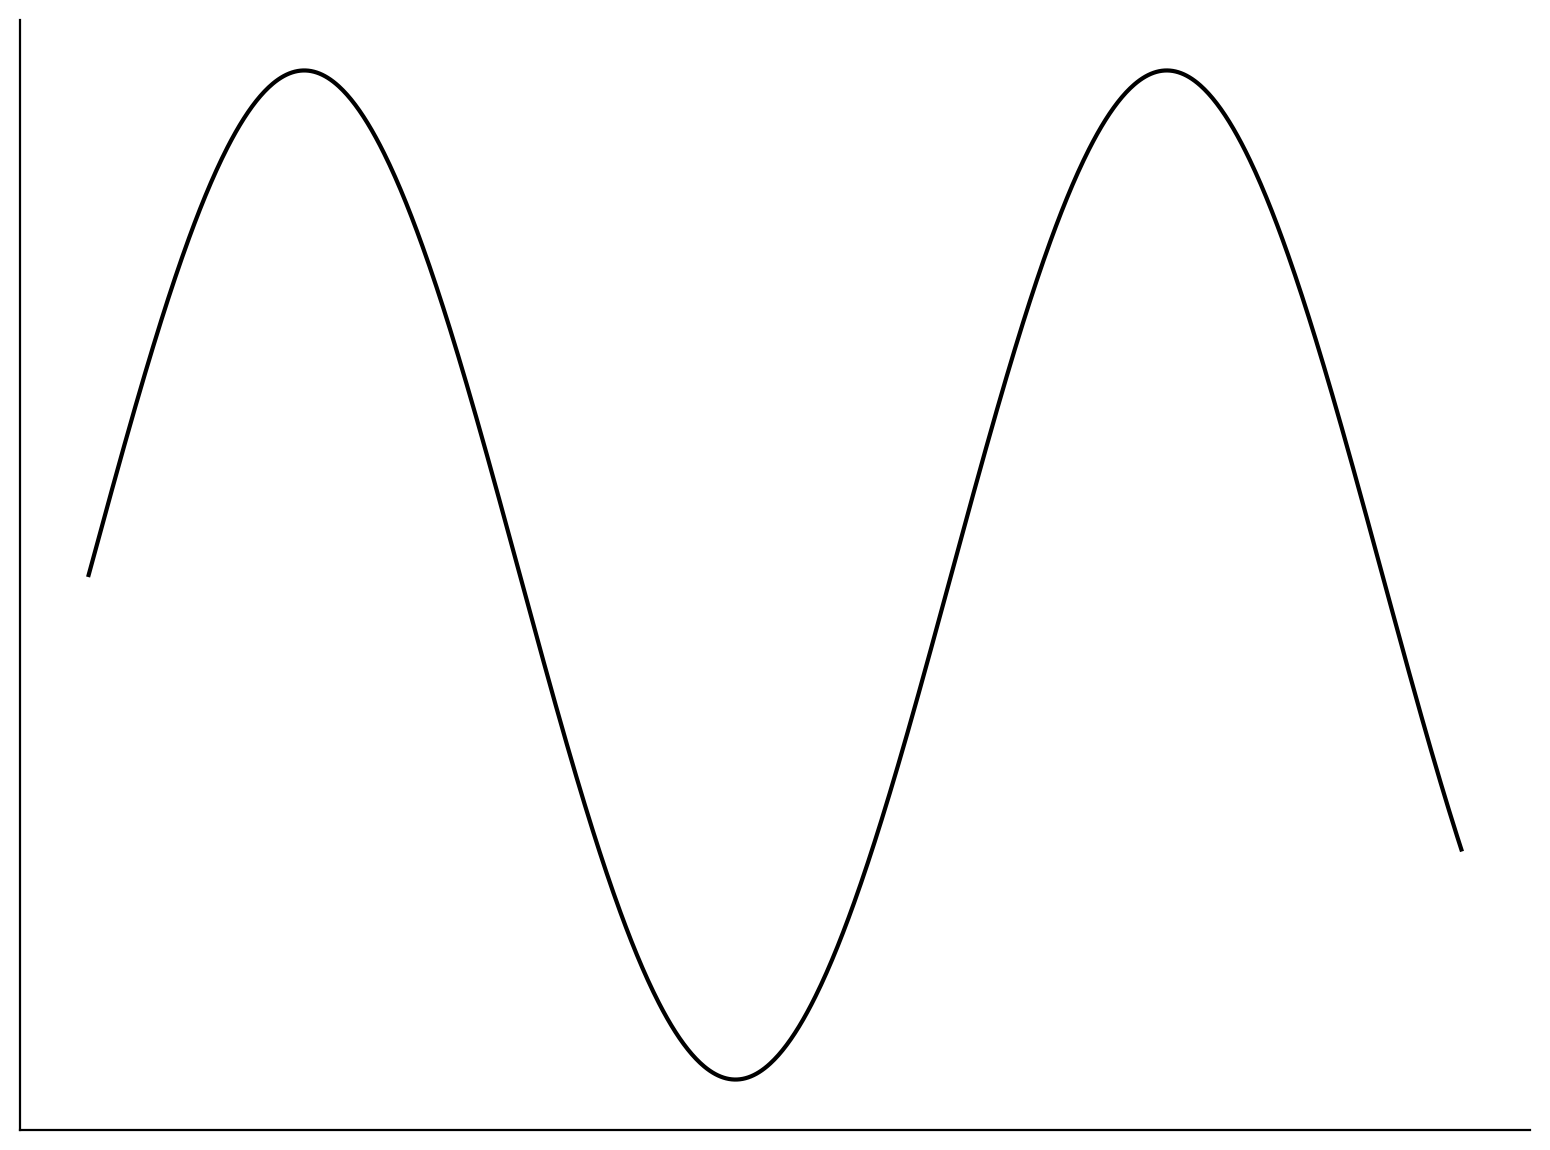

In [50]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x),'k');
plt.xticks([])
plt.yticks([])

<ipython-input-20-3abc2cdcc70d>:10: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


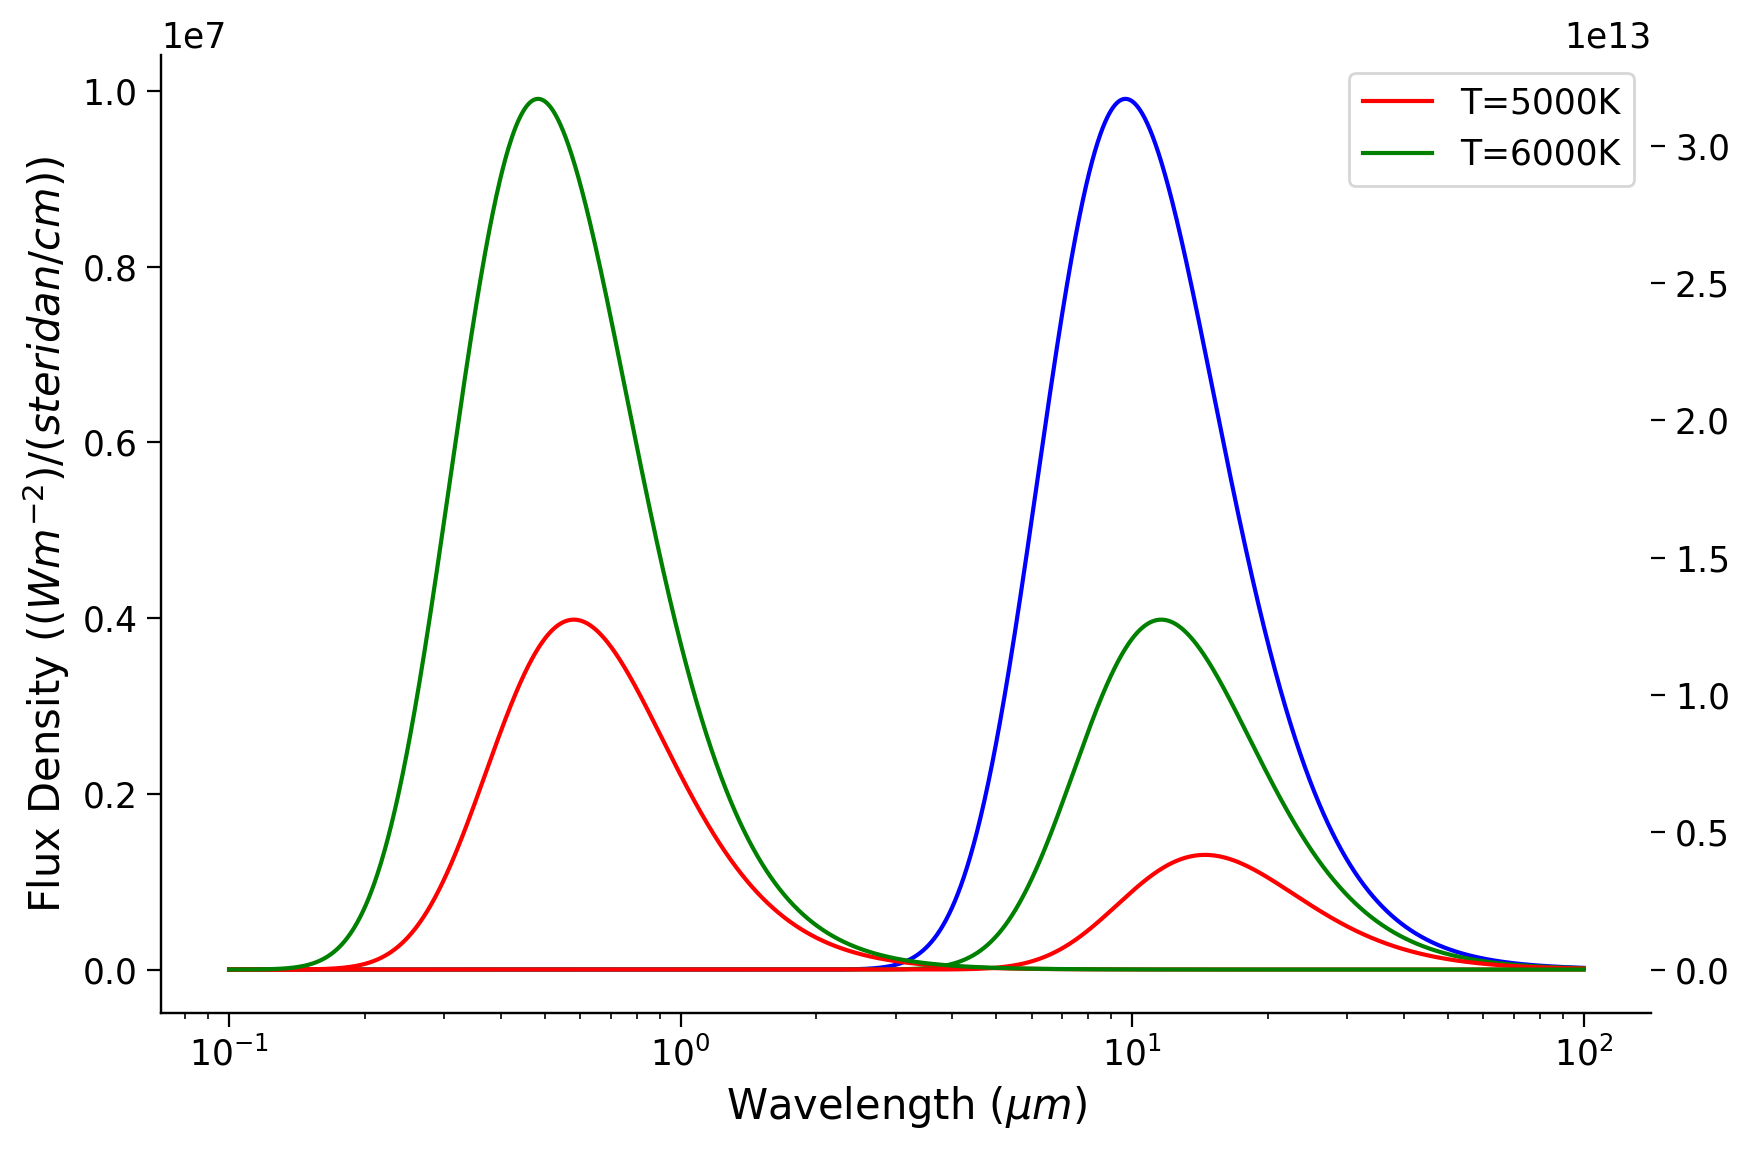

In [20]:
fig, ax1 = plt.subplots(figsize=(9, 6))

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 100nm to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(100e-9, 100e-6, 1e-9) 

# intensity at different temperatures
intensity200 = planck(wavelengths, 200.)
intensity250 = planck(wavelengths, 250.)
intensity300 = planck(wavelengths, 300.)

ax1.plot(wavelengths*1e6, intensity300, 'b-', label = 'T=300K') 
ax1.plot(wavelengths*1e6, intensity250, 'g-', label = 'T=250K') 
ax1.plot(wavelengths*1e6, intensity200, 'r-', label = 'T=200K') 

ax1.set_xscale('log')
ax1.set_xlabel('Wavelength ($\mu m$)')
ax1.set_ylabel('Flux Density ($(Wm^{-2})/(steridan/cm)$)')

# create new axis for solar blackbody curves
ax2 = ax1.twinx()  
# ax2.set_ylim(4, 20);

# intensity at different temperatures
intensity200 = planck(wavelengths, 5000.)
intensity250 = planck(wavelengths, 6000.)

ax2.plot(wavelengths*1e6, intensity200, 'r-', label = 'T=5000K') 
ax2.plot(wavelengths*1e6, intensity250, 'g-', label = 'T=6000K') 

# add legend
plt.legend()

<ipython-input-37-84ba6b502135>:10: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


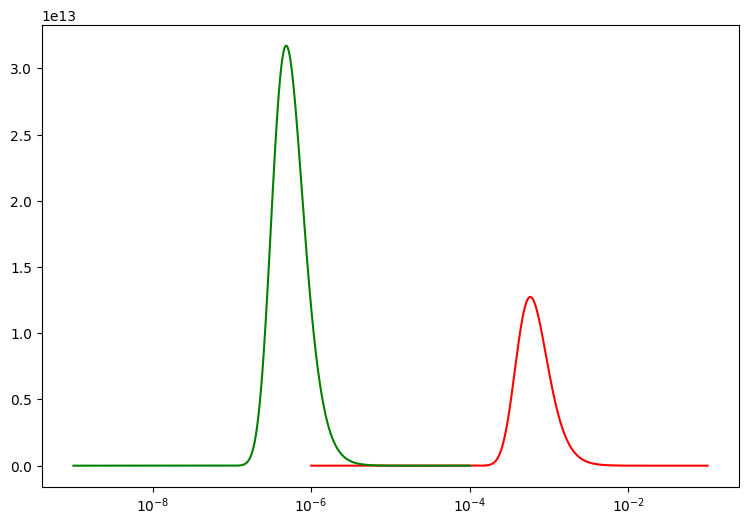

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 100nm to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 100e-6, 1e-9) 

# intensity at different temperatures
intensity200 = planck(wavelengths, 5000.)
intensity250 = planck(wavelengths, 6000.)

ax.plot(wavelengths*1e3, intensity200, 'r-', label = 'T=5000K') 
ax.plot(wavelengths, intensity250, 'g-', label = 'T=6000K') 
ax.set_xscale('log')